<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [1]:

import pandas as pd
df=pd.read_csv('/content/software_reviews  - sentiment_analyzed_software_reviews (1)-4.csv.csv')
df


,document_id,reviews,sentiment
0,1,Drizzy P5.0 out of 5 stars\nPerfect\nReviewed ...,positive
1,2,Christopher Farbrother5.0 out of 5 stars\nWork...,positive
2,3,J.B.5.0 out of 5 stars\nGreat value!\nReviewed...,positive
3,4,Mr. F4.0 out of 5 stars\nNot faster than my fa...,positive
4,5,amber haughton5.0 out of 5 stars\nCharges supe...,positive
...,...,...,...
1904,1905,amber haughton5.0 out of 5 stars\nCharges supe...,positive
1905,1906,G. Ries5.0 out of 5 stars\nFast Charging on Go...,positive
1906,1907,Staying Focused5.0 out of 5 stars\nExcellent\n...,positive
1907,1908,Steve young4.0 out of 5 stars\nreviews are su...,positive


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1909 entries, 0 to 1908
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   document_id  1909 non-null   object
 1   reviews      1908 non-null   object
 2   sentiment    1908 non-null   object
dtypes: object(3)
memory usage: 44.9+ KB


In [51]:
#1 Features used are Text cleaning are Removing punctuation from the 'reviews' column, Converting text to lowercase and # Removing stopwords from the 'reviews' column.
import pandas as pd
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords', quiet=True)


df['reviews'] = df['reviews'].astype(str)

# Removing punctuation from the 'reviews' column
df['reviews'] = df['reviews'].str.replace('[^\w\s]', '', regex=True)

# Converting text to lowercase
df['reviews'] = df['reviews'].apply(lambda x: " ".join(word.lower() for word in x.split()))


stop = stopwords.words('english')

# Removing stopwords from the 'reviews' column
df['reviews'] = df['reviews'].apply(lambda x: " ".join(word for word in x.split() if word not in stop))


<ipython-input-51-cb9c395a3010>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'] = df['reviews'].astype(str)
<ipython-input-51-cb9c395a3010>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'] = df['reviews'].str.replace('[^\w\s]', '', regex=True)
<ipython-input-51-cb9c395a3010>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [48]:
import gensim

# Tokenize the text
corpus = df['reviews'].apply(str.split)

# Create a dictionary with the corpus
dictionary = gensim.corpora.Dictionary(corpus)

# Convert corpus into a bag of words
bow_corpus = [dictionary.doc2bow(text) for text in corpus]

# Build the LDA model
num_topics = 10
lda_model = gensim.models.LdaModel(corpus=bow_corpus, id2word=dictionary, num_topics=num_topics, passes=10, alpha='auto')

# Print the top 10 clusters/topics
for index, topic in enumerate(lda_model.show_topics(num_topics=num_topics)):
    print(f"Topic {index}:")
    print(topic)

Topic 0:
(0, '0.034*"wall" + 0.031*"quality" + 0.029*"charger" + 0.022*"cable" + 0.022*"pixel" + 0.021*"google" + 0.017*"typec" + 0.017*"high" + 0.016*"dont" + 0.016*"25w"')
Topic 1:
(1, '0.048*"comments" + 0.048*"fast" + 0.048*"helpful" + 0.048*"charger" + 0.048*"works" + 0.024*"right" + 0.024*"purchase" + 0.024*"later" + 0.024*"2024verified" + 0.024*"5"')
Topic 2:
(2, '0.060*"helpful" + 0.060*"comments" + 0.030*"loading" + 0.030*"stars" + 0.030*"reviewed" + 0.030*"report" + 0.030*"purchase" + 0.030*"problem" + 0.030*"later" + 0.030*"19"')
Topic 3:
(3, '0.045*"comments" + 0.045*"helpful" + 0.022*"5" + 0.022*"right" + 0.022*"united" + 0.022*"problem" + 0.022*"try" + 0.022*"2024verified" + 0.022*"report" + 0.022*"0"')
Topic 4:
(4, '0.025*"phone" + 0.025*"got" + 0.025*"new" + 0.025*"verizon" + 0.018*"chargers" + 0.018*"tmobile" + 0.018*"samsung" + 0.018*"works" + 0.018*"us" + 0.018*"a54"')
Topic 5:
(5, '0.053*"comments" + 0.053*"fast" + 0.027*"charge" + 0.027*"problem" + 0.027*"report" +

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [5]:
# Write your code here
import pandas as pd
df=pd.read_csv('/content/software_reviews  - sentiment_analyzed_software_reviews (1)-4.csv.csv')
df



,document_id,reviews,sentiment
0,1,Drizzy P5.0 out of 5 stars\nPerfect\nReviewed ...,positive
1,2,Christopher Farbrother5.0 out of 5 stars\nWork...,positive
2,3,J.B.5.0 out of 5 stars\nGreat value!\nReviewed...,positive
3,4,Mr. F4.0 out of 5 stars\nNot faster than my fa...,positive
4,5,amber haughton5.0 out of 5 stars\nCharges supe...,positive
...,...,...,...
1904,1905,amber haughton5.0 out of 5 stars\nCharges supe...,positive
1905,1906,G. Ries5.0 out of 5 stars\nFast Charging on Go...,positive
1906,1907,Staying Focused5.0 out of 5 stars\nExcellent\n...,positive
1907,1908,Steve young4.0 out of 5 stars\nreviews are su...,positive


In [6]:
df['sentiment'].value_counts()

sentiment
positive    1869
negative      39
Name: count, dtype: int64

In [7]:
#1
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Assuming df is already loaded
# Convert 'reviews' column to string, handling NaN values
df['reviews'] = df['reviews'].astype(str)

# Remove punctuation
df['reviews'] = df['reviews'].str.replace('[^\w\s]', '', regex=True)

# Convert text to lowercase
df['reviews'] = df['reviews'].apply(lambda x: " ".join(word.lower() for word in x.split()))

# Download stopwords from NLTK
nltk.download('stopwords')

# Get the list of English stopwords
stop = stopwords.words('english')

# Remove stopwords from the 'reviews' column
df['reviews'] = df['reviews'].apply(lambda x: " ".join(word for word in x.split() if word not in stop))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Features I have selected:

Lowercasing: Because case sensitivity leads to word duplication, converting all text to lowercase guarantees data consistency. It simplifies the analysis and aids in text standardization.
Elimination of Stopwords: Stopwords are commonly occurring words in a language (such as "the," "is," and") that typically have little to no meaning in sentiment analysis tasks. Eliminating stopwords improves the accuracy of sentiment classification by focusing attention on the words that convey sentiment and reducing noise in the data.

Elimination of Punctuation: Punctuation can introduce noise into the data and is often not useful for sentiment analysis. As a result, cutting punctuation increases the accuracy of sentiment classification while drawing attention to the important words.


In [8]:
#2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

# Example data correction
df['reviews'] = df['reviews'].fillna('')  # Replace 'reviews' with the actual text column name

# Initialize a TfidfVectorizer
tfidf_vector = TfidfVectorizer()

# Transform the text column using TfidfVectorizer
X_tfidf = tfidf_vector.fit_transform(df['reviews'])  # Assuming 'reviews' is the correct column

# Print the shape of the resulting TF-IDF matrix
print(X_tfidf.shape)


(1909, 285)


In [9]:
#2 and 3

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer


df = df.dropna(subset=['sentiment'])

# Initialize a TfidfVectorizer and transform the text data
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['reviews'])  # Assuming 'reviews' is your text column

# Split the data into training and testing sets



x_train, x_test, y_train, y_test = train_test_split(
    X_tfidf,
    df['sentiment'],
    test_size=0.2,
    random_state=111
)



# Initializing and training the Multinomial Naive Bayes model

mnb = MultinomialNB()
model_mnb = mnb.fit(x_train, y_train)

# Predict the labels for the test set
y_pred_mnb = model_mnb.predict(x_test)

# Print the accuracy score and classification report of the Multinomial Naive Bayes model
print('Accuracy:', accuracy_score(y_test, y_pred_mnb))
print('Classification Report Multinomial Naive Bayes model:')
print(classification_report(y_test, y_pred_mnb))

# Perform cross-validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mnb, x_test, y_test, cv=5)
print("Cross-Validation Scores using MNB", scores)


Accuracy: 0.9842931937172775
Classification Report Multinomial Naive Bayes model:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         6
    positive       0.98      1.00      0.99       376

    accuracy                           0.98       382
   macro avg       0.49      0.50      0.50       382
weighted avg       0.97      0.98      0.98       382

Cross-Validation Scores using MNB [0.98701299 0.97402597 0.98684211 0.98684211 0.98684211]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
#3
from sklearn.svm import LinearSVC

# Initialize the SVM classifier
svm = LinearSVC()

model_svm = svm.fit(x_train,y_train)
y_pred_svm = model_svm.predict(x_test)
print(classification_report(y_test,y_pred_svm))
print('Accuracy %s' % accuracy_score(y_pred_svm,y_test))

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         6
    positive       0.98      1.00      0.99       376

    accuracy                           0.98       382
   macro avg       0.49      0.50      0.50       382
weighted avg       0.97      0.98      0.98       382

Accuracy 0.9842931937172775


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

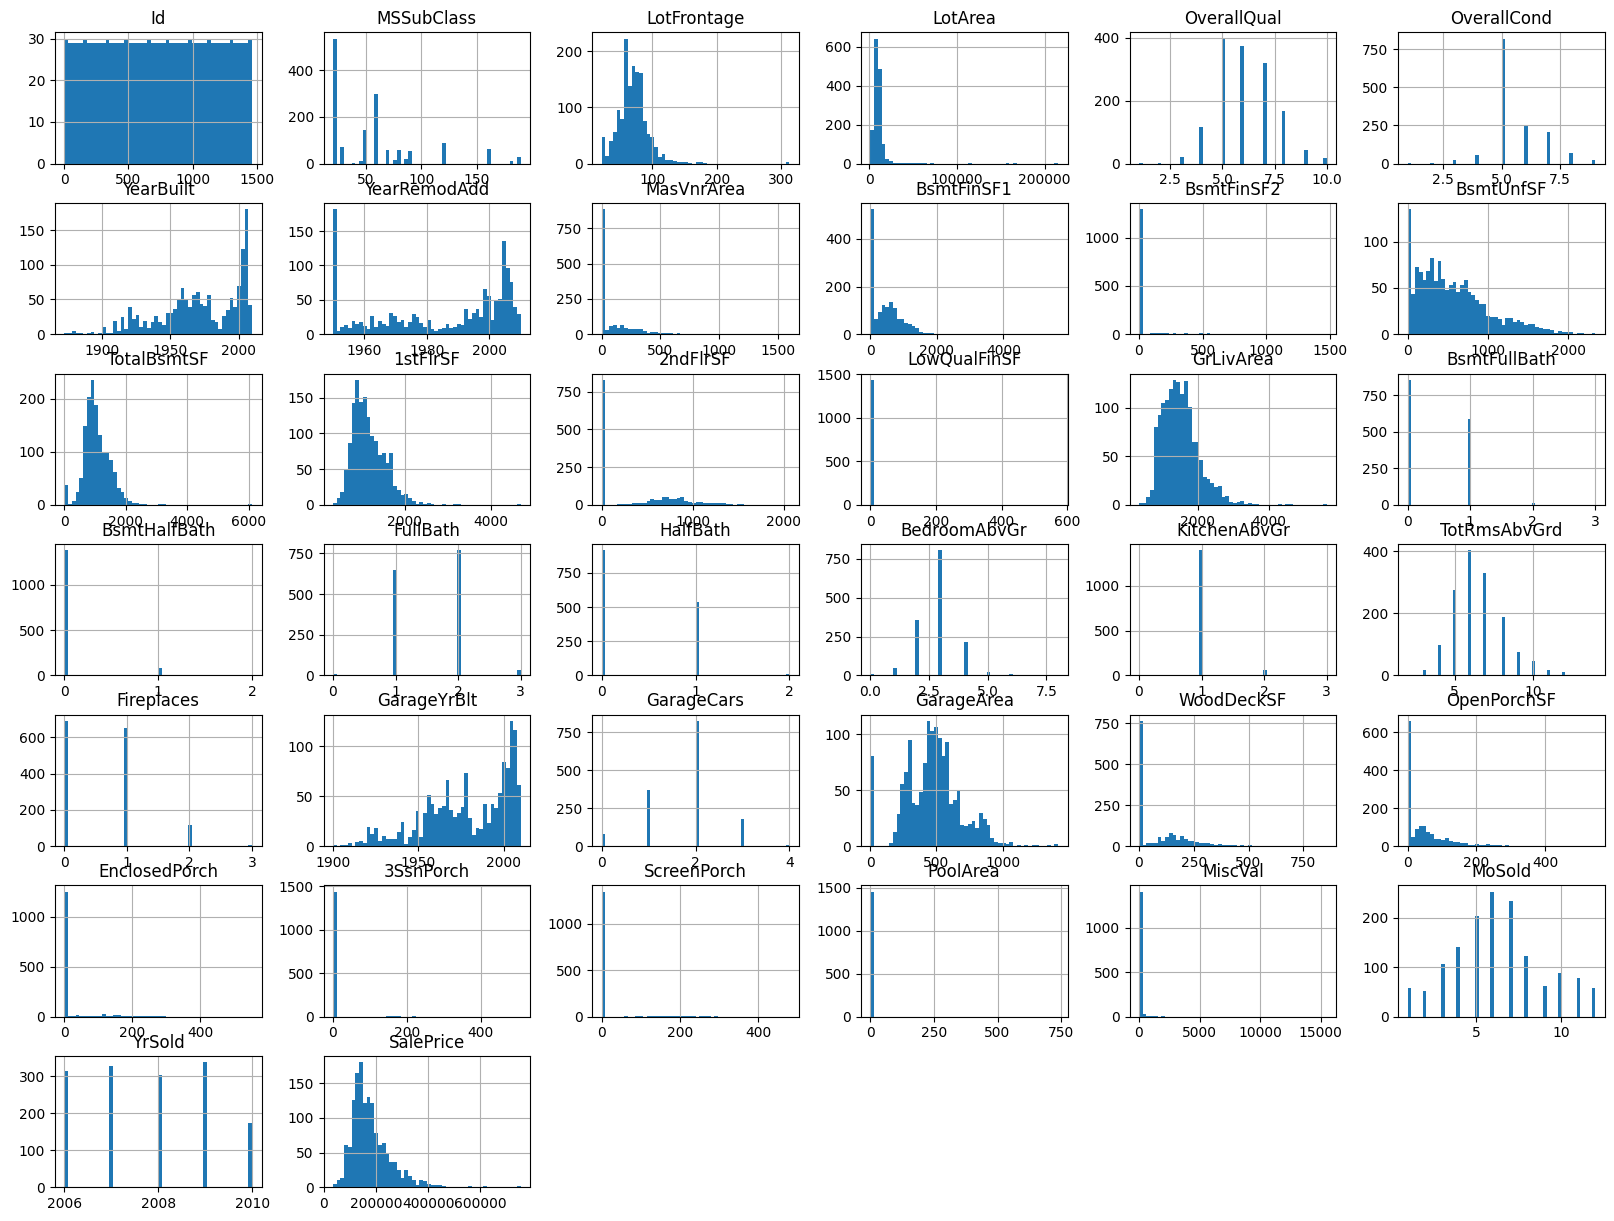

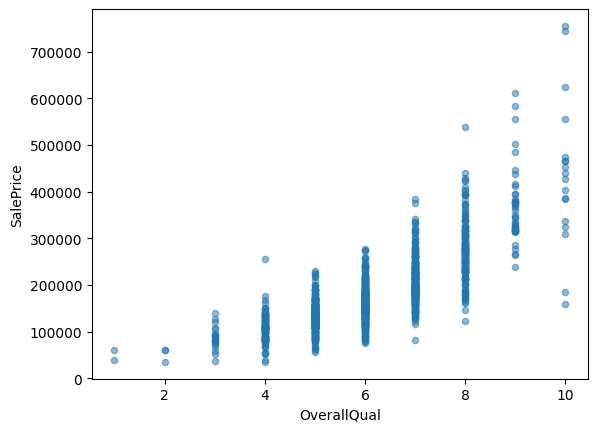

In [19]:
#1
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Load the datasets
train = pd.read_csv('train.csv')  # Adjust path if needed
test = pd.read_csv('test.csv')  # Adjust path if needed

# EDA: Overview of the data
print(train.describe())
print(train.isnull().sum())

# Data Cleaning: Handling missing values
train.replace([np.inf, -np.inf], np.nan, inplace=True)
train.fillna(method='ffill', inplace=True)  # Forward fill; choose method appropriate to data

# Histograms for numerical features
train.hist(bins=50, figsize=(20,15))
plt.show()

# Scatter plot to explore potential relationships
train.plot(kind="scatter", x="OverallQual", y="SalePrice", alpha=0.5)

# Splitting data into training and validation sets
x_train, x_validation, y_train, y_validation = train_test_split(train.iloc[:, :-1], train['SalePrice'], test_size=0.2, random_state=42)


In [20]:
#2 Feature Selection
# Let's say 'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', and 'GarageCars' show strong correlations with 'SalePrice'
features = ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars']

# Prepare the feature matrix
x_train_selected = x_train[features]
x_validation_selected = x_validation[features]


# Explanation:
These features could be a useful feature of the model predictor because of the high correlation that shows a strong linear relationship. This feature was selected based on the high correlation while checking the target variable "SalePrice" during EDA.

In [21]:
#3
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the selected training features
model.fit(x_train_selected, y_train)


LinearRegression()

In [22]:
#4
from sklearn.metrics import mean_squared_error, r2_score

# Making predictions on the validation set
y_pred = model.predict(x_validation_selected)

# Evaluating the model
mse = mean_squared_error(y_validation, y_pred)
r2 = r2_score(y_validation, y_pred)

# Display the performance metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared Score:", r2)


Mean Squared Error (MSE): 1595555039.1611454
R-squared Score: 0.7919834181672607


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [54]:
# 1 Provide a brief description of the PLM you selected, including its original pretraining data sources, number of parameters, and any task-specific fine-tuning if applied.
'''
I have selected RobRoBERTa (Robustly Optimized BERT Approach) which is an optimized version of the BERT model which was introduced by Facebook AI. Here is a detailed description based on the criteria:

Primary Pretraining Data Sources: Compared to BERT, RoBERTa was trained on a substantially bigger corpus. This contains a total of almost 160GB of text data from five major data sources: BooksCorpus, English Wikipedia, CC-News, OpenWebText, and Stories.

The approximate number of parameters in RoBERTa-base is 125 million, whereas the approximate number in RoBERTa-large is 355 million. With the help of these parameters, the model was able to identify and learn from intricate patterns present in the massive amount of training data.

Task Specific fine-tuning:This model can be fine-tuned further to other various tasks, and there is no such a scenario in zero-shot sentiment analysis when this is not achievable. Instead, it makes use of the model's pre-trained weights to predict sentiment categories, much in the way that the model does in pretraining, but with the application of fine-tuned task-specific weights. This clearly points towards the model having the capability for adapting to further generalization beyond the pretraining process.

'''

"\nI have selected RobRoBERTa (Robustly Optimized BERT Approach) which is an optimized version of the BERT model which was introduced by Facebook AI. Here is a detailed description based on the criteria:\n\nPrimary Pretraining Data Sources: Compared to BERT, RoBERTa was trained on a substantially bigger corpus. This contains a total of almost 160GB of text data from five major data sources: BooksCorpus, English Wikipedia, CC-News, OpenWebText, and Stories.\n\nThe approximate number of parameters in RoBERTa-base is 125 million, whereas the approximate number in RoBERTa-large is 355 million. With the help of these parameters, the model was able to identify and learn from intricate patterns present in the massive amount of training data.\n\nTask Specific fine-tuning:This model can be fine-tuned further to other various tasks, and there is no such a scenario in zero-shot sentiment analysis when this is not achievable. Instead, it makes use of the model's pre-trained weights to predict sent

In [38]:
#2
import pandas as pd
from transformers import pipeline

# Load data
data = pd.read_csv('/content/software_reviews  - sentiment_analyzed_software_reviews (1)-4.csv.csv')

# Take only the first 50 reviews
data = data.head(50)

# Load RoBERTa-based zero-shot classification pipeline
classifier = pipeline("zero-shot-classification", model="roberta-base")

# Perform sentiment analysis
data['predicted_sentiment'] = data['reviews'].apply(
    lambda x: classifier(x, candidate_labels=["positive", "negative", "neutral"])['labels'][0]
)

# Display predictions for the first 50 reviews
data[['reviews', 'sentiment', 'predicted_sentiment']].head()


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Failed to determine 'entailment' label id from the label2id mapping in the model config. Setting to -1. Define a descriptive label2id mapping in the model config to ensure correct outputs.


,reviews,sentiment,predicted_sentiment
0,Drizzy P5.0 out of 5 stars\nPerfect\nReviewed ...,positive,negative
1,Christopher Farbrother5.0 out of 5 stars\nWork...,positive,negative
2,J.B.5.0 out of 5 stars\nGreat value!\nReviewed...,positive,positive
3,Mr. F4.0 out of 5 stars\nNot faster than my fa...,positive,positive
4,amber haughton5.0 out of 5 stars\nCharges supe...,positive,positive


In [56]:
# 2) accuracy,Precision,Recall and F1 score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
# Extract true and predicted labels
true_labels = data['sentiment']
predicted_labels = data['predicted_sentiment']

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(true_labels, predicted_labels)
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predicted_labels, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.68
Precision: 0.5238095238095238
Recall: 0.5555555555555556
F1 Score: 0.5


In [57]:
'''3)
Strengths, Weaknesses, and challenges
Pros

RoBERTa: High accuracy and robustness with RoBERTa come from extreme training over diverse sources of data, enabling it to take in mind-bending complex language patterns, thus giving a significant boost in performance on most NLP tasks, including sentiment analysis.
Generalization to out-of-sample data: With its strong pretraining, RoBERTa may generalize well to an out-of-sample setting with no task-specific fine-tuning.

disadvantage

Resource-Heavy: Making use of RoBERTa, especially the larger models, consumes a lot of computational resources, which are a limitation for some without really good machines or cloud service accessibility.
Deployment Complexity: The size and complexity of the model present challenges in deployment, especially in a low-resourced environment.

Problems:

Context and polarity handling: As a general rule, RoBERTa could, however, have difficulty capturing more subtle nuances in sentiment when meaning is rather context-dependent.
 Model Interpretability: Like most other deep learning models, it is hard to interpret why RoBERTa makes certain predictions, hence complicating efforts aimed at improving or debugging the model.
'''


'3)\nStrengths, Weaknesses, and challenges\nPros\n\nRoBERTa: High accuracy and robustness with RoBERTa come from extreme training over diverse sources of data, enabling it to take in mind-bending complex language patterns, thus giving a significant boost in performance on most NLP tasks, including sentiment analysis.\nGeneralization to out-of-sample data: With its strong pretraining, RoBERTa may generalize well to an out-of-sample setting with no task-specific fine-tuning.\n\ndisadvantage\n\nResource-Heavy: Making use of RoBERTa, especially the larger models, consumes a lot of computational resources, which are a limitation for some without really good machines or cloud service accessibility.\nDeployment Complexity: The size and complexity of the model present challenges in deployment, especially in a low-resourced environment.\n\nProblems:\n\nContext and polarity handling: As a general rule, RoBERTa could, however, have difficulty capturing more subtle nuances in sentiment when meanin